# Exo Pandas

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')
births.head()


,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [172]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [152]:
births.count().index

Index(['year', 'month', 'day', 'gender', 'births'], dtype='object')

In [153]:
def count_enrg(object):
    a=0
    for x in object.itertuples():
        a +=1
    print('Il y a %s enregistrements.' %a)

In [154]:
births_sansNan = births.dropna()

In [155]:
count_enrg(births)
print(count_enrg(births_sansNan),' sans NaN')

Il y a 15547 enregistrements.
Il y a 15067 enregistrements.
None  sans NaN


In [156]:
# doublons

births_sansDoublons= births_sansNan.drop_duplicates()

In [157]:
count_enrg(births_sansDoublons)

Il y a 15067 enregistrements.


In [158]:
df_b= births_sansDoublons

In [159]:
df_b.day.unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 99.])

In [160]:
#nettoyer les dates
#df_b.day > 31
# jour sup a 31
df_b=df_b[df_b.day<32]
# supp 99
df_b=df_b[df_b.day!=99]

In [161]:
count_enrg(df_b)

Il y a 14717 enregistrements.


In [179]:
#sup 29 fev


df_b[df_b.month==2].sort_values(by=['day'], ascending=False)
df_b.drop(7000,0,inplace=True)


In [180]:
df_b([6990:7010])

SyntaxError: invalid syntax (<ipython-input-180-a26aae2daa5b>, line 1)

In [146]:
df_b.year.unique()

array([1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988], dtype=int64)

In [94]:
df_b.births.max()

6527

In [130]:
#reer une colonnes avec les décennies
for line,contenu in df_b.iterrows():
    contenu['decennie']= contenu['year']//10*10

df_b.head()

,year,month,day,gender,births,decennie,dt
0,1969,1,1,F,4046,1960,1/1/2000
1,1969,1,1,M,4440,1960,1/1/2000
2,1969,1,2,F,4454,1960,1/1/2000
3,1969,1,2,M,4548,1960,1/1/2000
4,1969,1,3,F,4548,1960,1/1/2000


In [131]:
1983//10 *10

1980

In [166]:
df_b_fev=df_b[df_b.month==2]
df_b_fev_28 = df_b_fev[df_b_fev.day <=29]



In [133]:
import datetime

# ajout d'une colonne datetime
#df_b['dt']= '1/1/2000'
df_b.head()

E:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,year,month,day,gender,births,decennie,dt
0,1969,1,1,F,4046,1960,1/1/2000
1,1969,1,1,M,4440,1960,1/1/2000
2,1969,1,2,F,4454,1960,1/1/2000
3,1969,1,2,M,4548,1960,1/1/2000
4,1969,1,3,F,4548,1960,1/1/2000


In [175]:
#modifier le format du jour
type(df_b.day)
for field in ["day", "month", "year"]:
    births[field] = births[field].astype(int)

df_b['day']=df_b['day'].apply(np.int64)
df_b.head()

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [167]:
#modifier le format du jour

pd.to_numeric(df_b.day)

from datetime import datetime
# creation de cette colonne day/month/year
for line,contenu in df_b.iterrows():
    datetime_str = str(contenu.day) +'/'+ str(contenu.month) +'/' + str(contenu.year)
    #print (datetime_str)
   #contenu['dt']=datetime.strptime(datetime_str, '%m/%d/%y')


In [ ]:
# ajout d'une colonne jour_semaine

In [168]:
# convertion en jour de la semaine

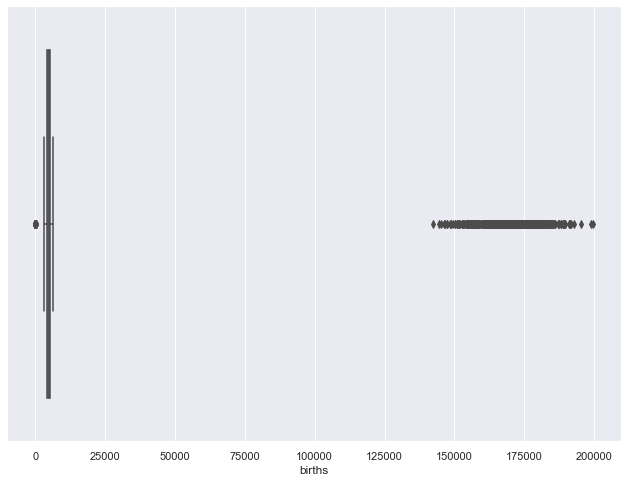

In [173]:
fig = plt.figure(figsize=(11,8))
fig = sns.boxplot(births.births)
